## Exploring Chinook Music Store

The Chinook Record Store Database is a detailed blueprint for a digital music shop, housing information on artists, songs, albums, customers, and purchases. It operates like a streamlined iTunes, organizing data into eleven tables. It's a valuable resource for music enthusiasts and data aficionados, offering deep insights into how a music store operates.

<img src = "relations.jpg" width = "75%" />

In [6]:
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
db = 'chinook.db'

def run_query(q):
    with sql.connect(db) as conn:
        return pd.read_sql_query(q,conn)

### Genre Analysis for Album Selection: Identifying Top-Selling Genres in the USA


As Chinook record store aims to expand its collection with three new albums, it faces the task of selecting from four diverse artists, each representing a distinct genre: Hip Hop, Punk, Pop, and Blues. With a focus on the US market and plans for targeted advertising, understanding the top-selling genres in the country is paramount.

| Artist Name        | Genre   |
|--------------------|---------|
| Regal              | Hip-Hop |
| Red Tone           | Punk    |
| Meteor & the Girls | Pop     |
| Slim Jim Bites     | Blues   |

Through an in-depth analysis of sales data, we'll uncover the prevailing genres in the USA, providing valuable insights to guide Chinook's album selection process. These insights will inform recommendations for the three artists whose albums the store should consider adding to its inventory.

In [8]:
q = """ 
WITH usa_tracks AS
    (SELECT t.genre_id AS genre_id, il.invoice_line_id
    FROM track AS t 
    INNER JOIN invoice_line AS il ON il.track_id = t.track_id
    INNER JOIN invoice AS i ON i.invoice_id = il.invoice_id 
    WHERE i.billing_country = 'USA'
    )
SELECT g.name genre_name,
    COUNT(usa.genre_id) num_purchases, 
    ROUND((CAST(COUNT(usa.genre_id) AS FLOAT)/ (SELECT COUNT(genre_id)
    FROM usa_tracks))*100,2) AS percentage_sold
FROM usa_tracks AS usa 
INNER JOIN genre AS g ON g.genre_id = usa.genre_id

GROUP BY g.name
ORDER BY num_purchases DESC """

df=run_query(q)
df

,genre_name,num_purchases,percentage_sold
0,Rock,561,53.38
1,Alternative & Punk,130,12.37
2,Metal,124,11.80
3,R&B/Soul,53,5.04
4,Blues,36,3.43
5,Alternative,35,3.33
6,Pop,22,2.09
7,Latin,22,2.09
8,Hip Hop/Rap,20,1.90
9,Jazz,14,1.33


C:\Users\Mushaf Mughal\AppData\Local\Temp\ipykernel_11680\315833895.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(df["genre_name"], fontsize = 10.5, color = "Grey")


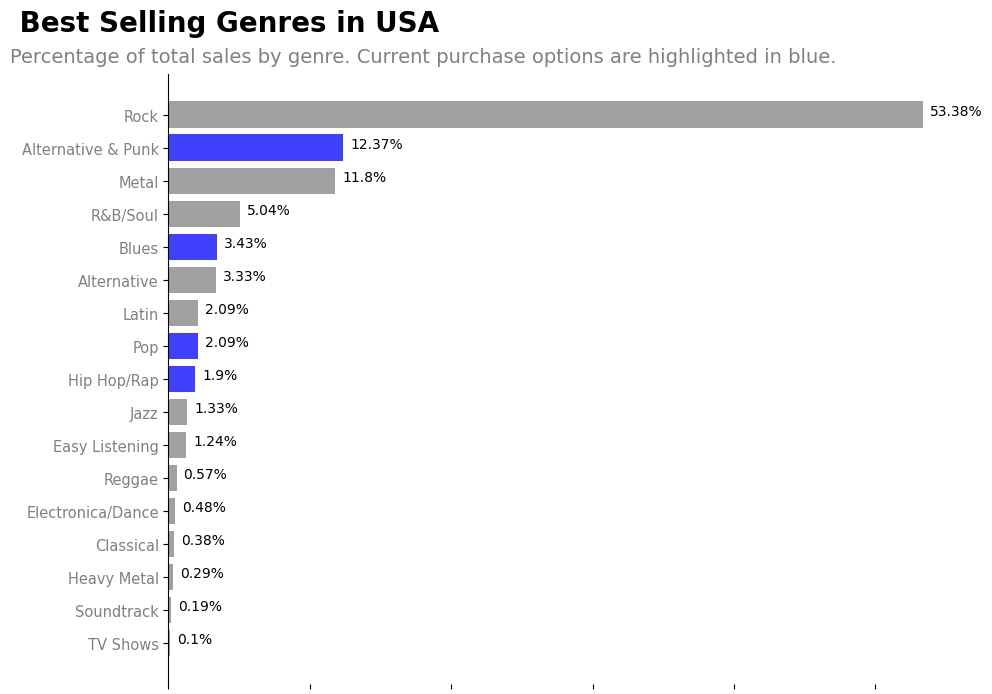

In [11]:
import matplotlib.pyplot as plt
# Sorting the DataFrame by percentage sold
df = df.sort_values(by='percentage_sold')
# Creating a color map to identify key albums of interest
album_options = ["Hip Hop/Rap", "Alternative & Punk", "Blues", "Pop"]
cmap = df["genre_name"].apply(lambda x: 'blue' if x in album_options else 'Grey')
# Plotting Data
fig, ax = plt.subplots(figsize=(10, 7))  # Adjust figsize as needed
bars = ax.barh(df["genre_name"], df["percentage_sold"], height=0.8, color=cmap, alpha=0.75, linewidth=1.5)
# Adding data labels and percentages at the end of each bar
for bar, perc in zip(bars, df["percentage_sold"]):
    ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, f"{perc}%",
            color='black', fontsize=10)
#Customizing axes and layout
ax.set_yticklabels(df["genre_name"], fontsize = 10.5, color = "Grey")
ax.set_xticklabels([])
for i in ["top", "right", "bottom"]:
    plt.gca().spines[i].set_visible(False)
plt.text(-0.2, 1.07, " Best Selling Genres in USA", fontsize=20, fontweight="bold", transform=plt.gca().transAxes, color="Black")
plt.text(-0.2, 1.02, "Percentage of total sales by genre. Current purchase options are highlighted in blue.", fontsize=14, transform=plt.gca().transAxes, color="grey")


plt.tight_layout()
plt.show()


**Results**

After analyzing the sales patterns of different genres in the USA, Chinook should consider the following options from the available list:

 * Punk: Red Tone
 * Blues: Slim Jim Bites
 * Pop: Meteor & the Girls

However, it's essential to note that these genres collectively represent only 17% of total sales. To optimize profitability, Chinook should also explore opportunities within the Rock genre, which dominates the US market with a commanding 53% share of sales.

## **Employee Sales Performance Analysis**


#### The Situation

After an initial purchase, each Chinook customer is assigned to a sales support agent, the company asked us to analyze purchase from customer belonging to each sales agent, they want to know if some agents are performing better or worse than others.

#### Analysis

To answer this question. We need to extract the names of the sales executives, their hire dates, the number of account they handle, and the total purchases made by these accounts, we will also compute the average sales for each account that the sales executives manage.


In [12]:
q = """
WITH t1 AS(SELECT em.first_name || ' ' || em.last_name AS sales_rep_name,
            em.hire_date, COUNT(cu.customer_id) AS num_invoices,
            CAST(SUM(iv.total) AS INTEGER) AS total_sales
            FROM employee em
            JOIN customer cu
            ON em.employee_id = cu.support_rep_id
            JOIN invoice iv 
            ON iv.customer_id = cu.customer_id
            GROUP BY 1
            ORDER BY 4 DESC)
            
SELECT *, ROUND(CAST(total_sales AS FLOAT)/num_invoices,2) 
AS sales_per_customer FROM t1;
"""
df = run_query(q)
df

,sales_rep_name,hire_date,num_invoices,total_sales,sales_per_customer
0,Jane Peacock,2017-04-01 00:00:00,212,1731,8.17
1,Margaret Park,2017-05-03 00:00:00,214,1584,7.40
2,Steve Johnson,2017-10-17 00:00:00,188,1393,7.41


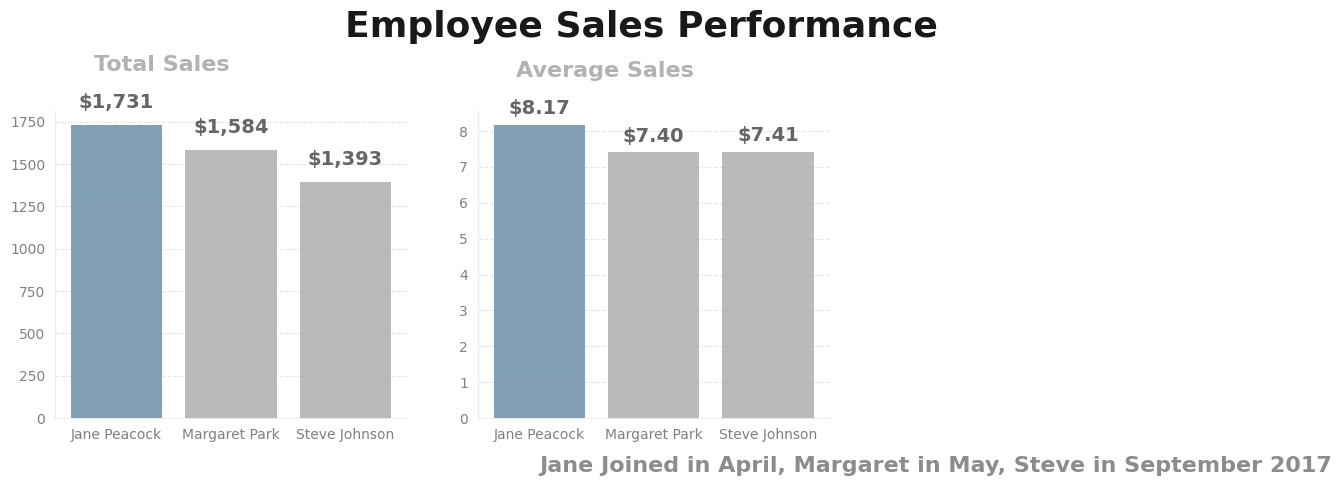

In [21]:
import matplotlib.pyplot as plt
# Data
sales_rep_name = df["sales_rep_name"].values
total_sales = df["total_sales"].values
sales_per_customer = df["sales_per_customer"].values
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
# Total sales chart
axes[0].bar(sales_rep_name, total_sales, color='#BABABA', width=0.8, label='Total Sales')
axes[0].bar(sales_rep_name[0], total_sales[0], color='#0064AB', alpha=0.3, width=0.8)
axes[0].text(x=-0.2, y=2050, s='Total Sales', size=16, fontweight='bold', alpha=0.3)
for sales, index in zip(total_sales, range(len(total_sales))):
    axes[0].text(x=index, y=sales + 100, s='${:,}'.format(sales), ha='center', fontweight='bold', alpha=0.6, size=14)
axes[0].text(x=2, y=2250, s='Employee Sales Performance', size=26, fontweight='bold', alpha=0.9)
# Average sales chart
axes[1].bar(sales_rep_name, sales_per_customer, color='#BABABA', width=0.8, label='Average Sales')
axes[1].bar(sales_rep_name[0], sales_per_customer[0], color='#0064AB', alpha=0.3, width=0.8)
axes[1].text(x=-0.2, y=9.5, s='Average Sales', size=16, fontweight='bold', alpha=0.3)
for sales, index in zip(sales_per_customer, range(len(sales_per_customer))):
    axes[1].text(x=index, y=sales + 0.3, s='${:,.2f}'.format(sales), ha='center', fontweight='bold', alpha=0.6, size=14)
axes[1].text(x=0, y=-1.5, s='Jane Joined in April, Margaret in May, Steve in September 2017', size=16, fontweight='bold', color='grey',alpha=0.9)
# Common attributes to both charts
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#DDD')
    ax.spines['left'].set_alpha(0.5)
    ax.spines['bottom'].set_color('#DDD')
    ax.spines['bottom'].set_alpha(0.5)
    ax.tick_params(left=False, bottom=False, labelsize=10, labelcolor='grey')
    ax.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()

**Results**

* Of the three sales employees, Jane achieved the highest total sales of **1,731 dollars**. Margaret Park comes second, and Steve occupies the last place with **1,393 dollars** in sales. This difference in sales is understandable, considering that Jane and Margaret were employed about **five** months before Steve.

* Jane’s average sales numbers support her leading position. She has achieved **8.17 dollars** in sales per customers, the highest of the three employees. Steve also performs marginally better than Margaret despite the difference in their employment dates.


#### **Sales by Country**
##### Situation
Chinook wants to understand how sales are distributed across different countries. The company intends to identify countries with growth potential and may even run advertising campaign in these countries.
##### Analysis
To answer this question, we will write a query that collates data on purchases from different countries. For each country, we will include the total number of customers, total sales value, average sales per customer, and the average order value. Where a country has only one customer, we will collect it into an "Other" group:

In [31]:
q="""
    --Collect the number of customers in each country
    WITH t1 AS( SELECT country, COUNT(customer_id) AS num_customers
                 FROM customer
                GROUP BY country 
             ),
             
             
    --Collect the total sales in each country
        t2 AS( SELECT cu.country,
                      ROUND(SUM(iv.total),2)  AS total_sales,
                      COUNT(iv.invoice_id) AS num_sales
                 FROM customer cu
                 JOIN invoice iv
                   ON cu.customer_id = iv.customer_id
                GROUP BY 1
             ),
             
    
    --Groups Countries with only one customer as "Others"
        t3 AS( SELECT CASE WHEN t1.num_customers = 1 THEN 'Others'
                           ELSE t1.country END AS countries,
                      SUM(t1.num_customers) AS num_customers,
                      SUM(t2.total_sales) AS total_sales,
                      SUM(t2.num_sales) AS num_sales
                 FROM t1
                 JOIN t2
                   ON t1.country = t2.country
                GROUP BY 1
             )
    
    --Calculate relevant sales metrics
    SELECT countries,
           num_customers,
           total_sales,
           ROUND(total_sales / num_sales, 2) AS avg_order_value,
           ROUND(total_sales / num_customers, 2) AS sales_per_customer
      FROM (
              SELECT *,
                  CASE WHEN countries = 'Others' THEN 1
                           ELSE 0 END AS sort
                FROM t3
            )
      ORDER  BY sort, num_customers DESC
    
                
  """
df = run_query(q)

In [32]:
# Additional Calculation
avg_cust_purchase = df.sales_per_customer.mean()
print(avg_cust_purchase)
df['percent_customers']= round(100*df.num_customers/df.num_customers.sum(),1)
df['percent_sales']=round(100*df.total_sales/df.total_sales.sum(),1)
df['cust_purchase_diff'] = round(100*(df.sales_per_customer-avg_cust_purchase)/avg_cust_purchase,2)


86.96099999999998


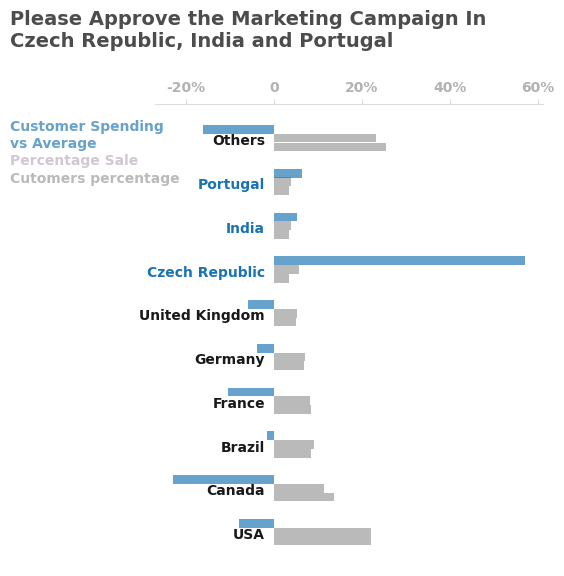

In [33]:
# Visualization
y_labs = df.countries.values
y_axes = np.arange(df.countries.size)

fig = plt.figure(figsize= (5,6))
plt.barh(y_axes-0.3,df.percent_customers,height=0.2,color='#BABABA')
plt.barh(y_axes-0.1,df.percent_sales,height=0.2,color='#BABABA')
plt.barh(y_axes+0.1,df.cust_purchase_diff,height=0.2,color='#0064AB',alpha=0.6)

color_map = ['','','','','','','Yes','Yes','Yes','']

#Annoatet y axis ticks
for loc, label,color in zip(y_axes, y_labs,color_map):
    if color =="Yes":
        plt.text(x=-2,y=loc-0.25, s=label,ha='right', color="#0064AB",
                alpha=0.9, size=10,fontweight="bold")
    else:
        plt.text(x=-2,y=loc-0.25, s=label,ha='right',alpha=0.9, size=10,fontweight="bold")

#Set plot legend
plt.text(x=-60,y=8.7, s="Customer Spending\nvs Average", color='#0064AB',
        size=10,alpha=0.6,fontweight='bold')
plt.text(x=-60,y=8.3, s="Percentage Sale", color='#BABA',size=10,fontweight='bold')
plt.text(x=-60,y=7.9, s="Cutomers percentage", color='#BABABA',size=10,fontweight='bold')

#Set plot title
plt.text(x=-60,y=11, s="Please Approve the Marketing Campaign In\nCzech Republic, India and Portugal",
         alpha=0.7,size=14,fontweight='bold')

for ax in fig.get_axes():
    plt.sca(ax)
    sns.despine(left=True,bottom=True,top=False)
    ax.tick_params(left=False ,bottom= False ,color="#ddd")
    ax.xaxis.set_ticks_position('top')
    ax.spines['top'].set_color('#DDD')
    plt.yticks([])
    plt.xticks([-20,0,20,40,60],['-20%', '0', '20%','40%','60%'],
              size=10,alpha=0.3,fontweight='bold')

#### **Results**
* Chinook's primary sales come from the **US** and **Canada**, where they boast a significant customer base and sales volume. However, the average spending per invoice is lower in these regions.

* In contrast, the **Czech Republic, Portugal, and India** exhibit fewer customers and lower sales figures, but they tend to spend more per invoice. To capitalize on this opportunity, Chinook could implement targeted marketing campaigns to expand its customer base and increase revenue from these markets.

Since the data from each country are relatively few, the initial marketing campaigns should be small. They should aim to collect and analyze customer data so that the right trends are confidently identified.

##### How Many Tracks Never Sell?
To answer this question, we will have to distinguish between the entire inventory of track in the ``track`` table and the distinct instances of tracks from the ``invoice_line table.``

In [41]:
q= """
WITH all_and_purchased AS
(
SELECT t.track_id all_tracks, il.track_id AS purchased_tracks
FROM track AS t
LEFT JOIN invoice_line il ON il.track_id = t.track_id
)
SELECT COUNT(DISTINCT a.all_tracks) total_tracks,
COUNT(DISTINCT a.purchased_tracks) tracks_purchased,
COUNT(DISTINCT a.all_tracks) - COUNT(DISTINCT a.purchased_tracks) not_purchased,
ROUND(COUNT(DISTINCT a.purchased_tracks)/CAST(COUNT(DISTINCT a.all_tracks) AS FLOAT),2) percent_purchased
FROM all_and_purchased AS a;
"""
df=run_query(q)
df

,total_tracks,tracks_purchased,not_purchased,percent_purchased
0,3503,1806,1697,0.52


In [42]:
purchased = df.T
purchased = purchased.iloc[[1,2],0]
purchased_list = purchased.tolist()

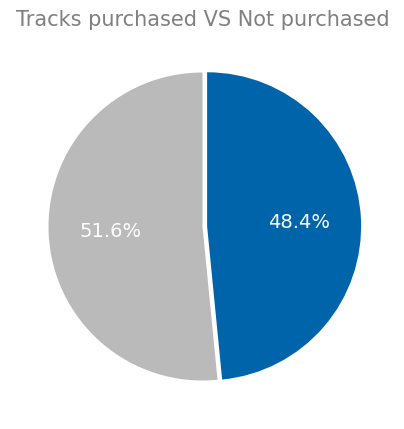

In [43]:
# Plot 
plt.pie(purchased_list,
        explode=(0,0.03),
        startangle=90,
        autopct='%1.1f%%',
        textprops={'fontsize':14,'color':'white'},
        colors=('#BABABA','#0064AB')
)
#Plot Aesthetics
plt.title("Tracks purchased VS Not purchased", fontsize=15,color='gray')
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.show()

#### Observations
* Surprisingly, almost half of the track inventory at Chinook has not sold. Lets take a look at the bottom performers and see of we can learn more:

In [44]:
q="""
SELECT ar.name artist_name, g.name genre, COUNT(il.track_id) units_sold
FROM track t
LEFT JOIN invoice_line il ON il.track_id = t.track_id
INNER JOIN album al ON al.album_id = t.album_id
INNER JOIN artist ar ON ar.artist_id = al.artist_id
INNER JOIN genre as g ON g.genre_id = t.genre_id
GROUP BY artist_name
HAVING units_sold = 0
ORDER BY units_sold;
"""
run_query(q)

,artist_name,genre,units_sold
0,Aaron Copland & London Symphony Orchestra,Classical,0
1,Academy of St. Martin in the Fields Chamber En...,Classical,0
2,"Academy of St. Martin in the Fields, John Birc...",Classical,0
3,"Academy of St. Martin in the Fields, Sir Nevil...",Classical,0
4,Adrian Leaper & Doreen de Feis,Classical,0
...,...,...,...
69,The Office,TV Shows,0
70,The Tea Party,Alternative & Punk,0
71,Ton Koopman,Classical,0
72,Toquinho & Vinícius,Bossa Nova,0


#### ``Observations``
74 artists have not sold any units, with most of these tracks belonging to the classical music genre.
Half of the company's inventory remains unsold, potentially trying up woeking capital without generating returns. 
Depending on the payment arrangement with record labels, there are two scenarios to consider:

1. If Chinook pays a fixed fee to host these tracks, it might be wise to focus on more popular genres and discontinues signing less succesful artists.

2. If Chinook pays the record label based on sales percentage, there is little downside to keeping the tracks in the store.

Regardless of the scenario, Chinook should explore ways to promote these low-selling artists. Suggestions could be integrated into the purchasing process or displayed on the website's cart page to increase exposure.

#### `` Albums VS Individual Tracks``

The Chinook store allows customers to buy music in two ways: either album or as individual track. However individuals cant buy a full album then add individual tracks to the same purchase unless they select each track manually.When customer purchase albums, they are charged the same price as if they had bought each track seperately.

Management is contemplating a new purchasing approach to cut costs. Instead of buying every track on album, they are considering purchasing only the most popular tracks from each album from record companies.

In [45]:
q = """

WITH invoice_data AS
    (
    SELECT invoice_id, MIN(track_id) track_id
    FROM invoice_line
    GROUP BY 1
    ),
    
Album_purchased AS
(
    SELECT invoice_id,
    Case
        When
        (
            SELECT t2.track_id
            FROM track t1
            JOIN track t2
            ON
            t1.album_id = t2.album_id
            WHERE t1.track_id = invd.track_id
            
            Except
            
            SELECT il.track_id
            FROM invoice_line il
            WHERE il.invoice_id = invd.invoice_id
        ) IS NULL
        
        AND
        (
            SELECT il.track_id
            FROM invoice_line il
            WHERE il.invoice_id = invd.invoice_id
        
            Except
            
            SELECT t2.track_id
            FROM track t1
            JOIN track t2
            ON
            t1.album_id = t2.album_id
            WHERE t1.track_id = invd.track_id
        ) IS NULL
        
        
        Then 'YES'
        ELSE "NO"
        END AS Purchased_Album
    FROM invoice_data invd
)
SELECT Purchased_Album,
       COUNT(invoice_id ) AS no_of_invoices,
       CAST(COUNT(invoice_id) AS FLOAT) * 100 /
       (SELECT COUNT(*) FROM Album_purchased) AS percent

FROM Album_purchased
GROUP BY 1


"""

run_query(q)

,Purchased_Album,no_of_invoices,percent
0,NO,500,81.433225
1,YES,114,18.566775


## **Results**
Chinook's sales data reveals that 81% of purchases consist of individual tracks, with the remaining 19% representing complete album sales. While this highlights a clear preference for individual tracks, neglecting album sales could result in missed revenue opportunities.

#### **Conclusion and Recommendations**

Our analysis offers actionable insights to enhance Chinook's profitability and customer satisfaction:

* **Genre Selection for New Albums:** Prioritize genres with strong popularity in the USA, focusing on Hip-Hop, Punk, and Pop. Additionally, leveraging the dominance of Rock songs in US sales can further bolster revenue.

* **Employee Performance:** Recognize top performers like Jane Peacock and provide targeted support and training to newer employees like Steve Johnson to maximize team productivity.

* **Sales Analysis by Country:** Target marketing efforts towards countries like the Czech Republic, India, and Portugal, where customers exhibit higher average spending per transaction, to drive sales growth.

* **Track Purchasing Strategy:** While prioritizing popular tracks, ensure a balanced approach that caters to customers who prefer purchasing complete albums. Conduct customer surveys to understand preferences and refine purchasing strategies accordingly.

In conclusion, by implementing these recommendations and remaining agile in responding to customer preferences, Chinook can optimize operations, elevate customer satisfaction, and achieve sustained growth and profitability.